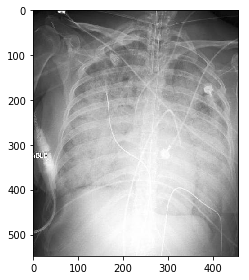

In [4]:
from skimage import io
from matplotlib import pyplot as plt


original = io.imread('uno.jpg')
io.imshow(original)

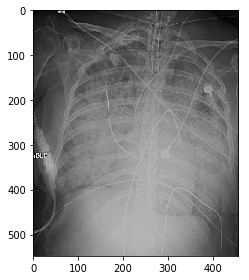

In [5]:

import cv2
from skimage import io 

image = cv2.imread('uno.jpg')
gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0)
unsharp_image = cv2.addWeighted(image, 1.2, gaussian_3, -0.5, 1, image)
io.imshow(unsharp_image)

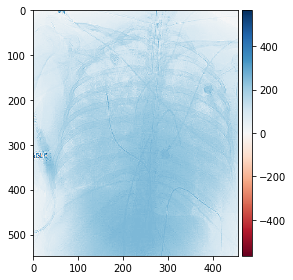

In [6]:

import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
 
original_image = plt.imread('uno.jpg').astype('uint16')
 
# Convert to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
 
# Median filtering
gray_image_mf = median_filter(gray_image, 1)
 
# Calculate the Laplacian
lap = cv2.Laplacian(gray_image_mf,cv2.CV_64F)
 
# Calculate the sharpened image
sharp = gray_image - 0.7*lap

io.imshow(sharp)

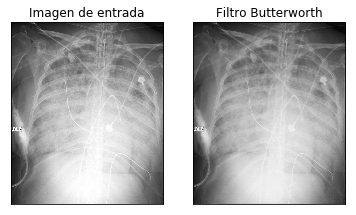

In [7]:
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image
import math
import sys
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'
a = Image.open('uno.jpg').convert('L')
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline
#Se convierte la imagen en un array
b = numpy.asarray(a)
#fft
c = np.fft.fft2(b)
#centrar fft
d= np.fft.fftshift(c)
#d = 20*np.log(1+np.abs(d))
M=d.shape[0]
N=d.shape[1]
H=numpy.ones((M,N))
center1=M/2
center2=N/2
d_0=100.0
t1=1
t2=2*t1
for i in range(1,M):
    for j in range (1,N):
        r1= (i-center1)**2+(j-center2)**2
        r=math.sqrt(r1)
        if  0<r<d_0:
            H[i,j]=1/(1+(r/d_0)**t2)             
img = Image.fromarray(H)
con=d*img
e=abs(fftim.ifft2(con))

plt.subplot(121),plt.imshow(a, cmap = 'gray')
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(e)
plt.title('Filtro Butterworth'), plt.xticks([]), plt.yticks([])
plt.show()


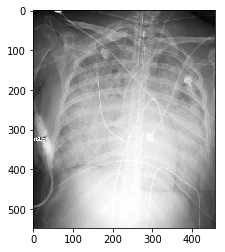

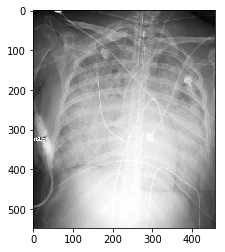

NameError: name 'mask' is not defined

In [8]:
nemo = cv2.imread('uno.jpg')
plt.imshow(nemo)
plt.show()
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()


light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
result = cv2.bitwise_and(nemo, nemo, mask=mask)
plt.subplot(1, 2, 1)
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

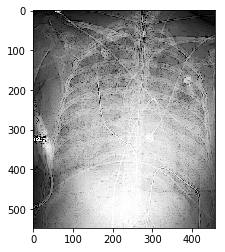

In [9]:
from PIL import Image, ImageFilter
 
foto = Image.open('uno.jpg').convert('L')
 
#Laplace
coeficientes = [1, 1, 1, 1, -8, 1, 1, 1, 1]
datos_laplace = foto.filter(ImageFilter.Kernel((3,3), coeficientes, 1)).getdata()
#datos de la imagen
datos_imagen = foto.getdata()
 
#factor de escalado
w = 1
 
#datos de imagen menos datos de Laplace escalados
datos_nitidez = [datos_imagen[x] - (w * datos_laplace[x]) for x in range(len(datos_laplace))]
 
imagen_nitidez = Image.new('L', foto.size)
imagen_nitidez.putdata(datos_nitidez)
imagen_nitidez.save('salida.jpg')
 
foto.close()
imagen_nitidez.close()


nemo = cv2.imread('salida.jpg')
plt.imshow(nemo)
plt.show()

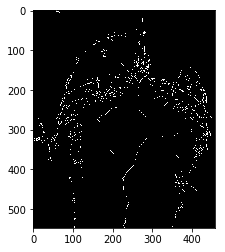

In [10]:
import cv2
import numpy as np

img = cv2.imread('uno.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,172,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True


plt.imshow(skel)
plt.show()

In [59]:
from PIL import Image, ImageFilter
 
tamaño = (5,5)
 
coeficientes = [0, 0, -1, 0, 0, 0, -1, -2, -1, 0, -1, -2, 16, -2, -1, 0, -1, -2, -1, 0, 0, 0, -1, 0, 0]


factor = 1
 
imagen_original = Image.open('uno.jpg')
 
imagen_procesada = imagen_original.filter(ImageFilter.Kernel(tamaño, coeficientes, factor))
 
#se graba el resultado
 
imagen_procesada.save('salida_2.jpg')
 
#se cierran ambos objetos creados de la clase Image
 
imagen_original.close()
 
imagen_procesada.close()


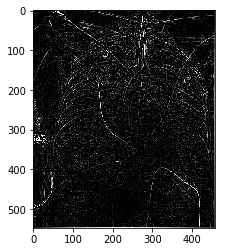

In [60]:

nemo = cv2.imread('salida_2.jpg')
plt.imshow(nemo)
plt.show()

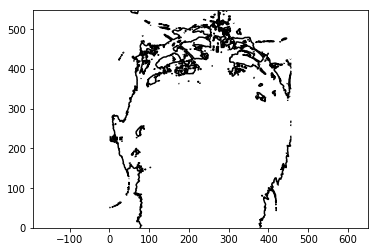

In [58]:
# obtener los contornos
# obtener los contornos
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('uno.jpg').convert('L'))

# create a new figure
figure()

# show contours with origin upper left corner
contour(im, levels=[130], colors='black', origin='image')
axis('equal')

show()

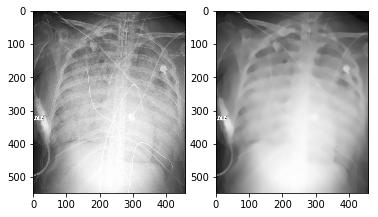

In [61]:
    import numpy as np
    import cv2
    from matplotlib import pyplot as plt
    img = cv2.imread('uno.jpg')
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    plt.subplot(121),plt.imshow(img)
    plt.subplot(122),plt.imshow(dst)
    plt.show()

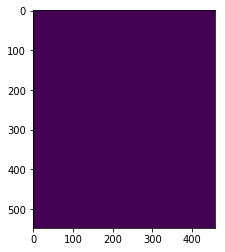

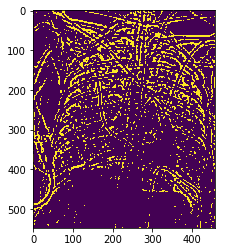

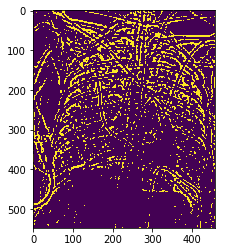

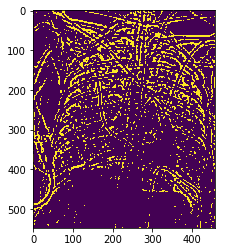

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_file = 'uno.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)
img = cv2.blur(img, (5, 5))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

thresh0 = cv2.adaptiveThreshold(s, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh1 = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2 = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh = cv2.bitwise_or(thresh0, thresh1)


plt.imshow(thresh0)
plt.show()

plt.imshow(thresh1)
plt.show()

plt.imshow(thresh2)
plt.show()
plt.imshow(thresh)
plt.show()



/Users/lasc/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


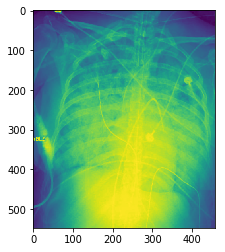

In [6]:
from skimage import io
from skimage import feature
from skimage.color import rgb2gray


from skimage import io
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

imagen = io.imread("uno.jpg")
img_gray = rgb2gray(imagen)

med = median(img_gray)

plt.imshow(med)
plt.show()



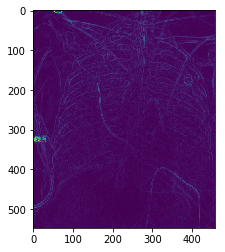

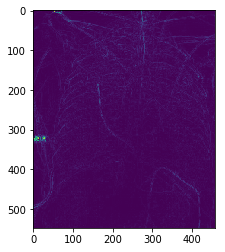

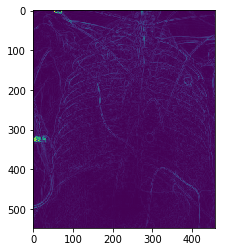

In [7]:
# Librerias necesarias
from skimage import io
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Abrimos la imagen
imagen = io.imread("uno.jpg")
imagen_g = rgb2gray(imagen)

# Filtros: sobel, roberts, prewitt
filtros = [filters.sobel, filters.roberts, filters.prewitt]

for filtro in filtros:
    # Aplicamos cada uno de los filtros
    img_fil = filtro(imagen_g)
    
    # Mostramos los resultados 
    plt.imshow(img_fil)
    plt.show()

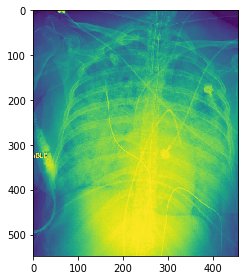

In [16]:
import numpy as np
import cv2
 
#Cargar la mascara
imagen = cv2.imread('uno.jpg',0)
 
#Crear un kernel de '1' de 3x3
kernel = np.ones((1,1),np.uint8)
 
#Se aplica la transformacion: Dilate
transformacion = cv2.dilate(imagen,kernel,iterations = 1)
 
#Mostrar el resultado y salir
cv2.imshow('resultado',transformacion)


original = io.imread('uno.jpg')
io.imshow(original)
plt.imshow(transformacion)
plt.show()


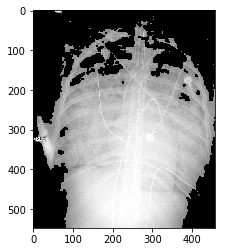

In [24]:
import cv2
import numpy as np

img = cv2.imread('uno.jpg')
img_bw = 255*(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 140).astype('uint8')

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

mask = np.dstack([mask, mask, mask]) / 255
out = img * mask

cv2.imwrite('output.png', out)

nemo = cv2.imread('output.png')
plt.imshow(nemo)
plt.show()

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('uno.jpg')
b,g,r = cv2.split(img)           # Obtener b,g,r
rgb_img = cv2.merge([r,g,b])     # Interambiar a RGB

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

<Figure size 640x480 with 2 Axes>

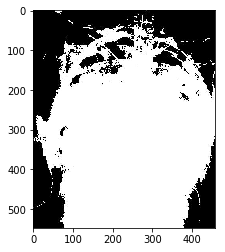

In [34]:
from PIL import Image

foto=Image.open('uno.jpg')

#si la imagen no es a escala de grises se hace la conversion
if foto.mode != 'L':
    foto=foto.convert('L')

#el umbral esta forzosamente comprendido entre 1 y 254 para las
#imagenes de 8 bits a escala de grises
umbral=10

datos=foto.getdata()
datos_binarios=[]

for x in datos:
    if x<umbral:
        datos_binarios.append(0)
        continue
    #si es mayor o igual a umbral se agrega 1 en ves de 0
    #podria hacerse con 255 en ves de 1
    datos_binarios.append(1)

#en caso de utilizar 255 como valor superior el metodo new
#llevaria 'L' en ves de '1' en el primer argumento
nueva_imagen=Image.new('1', foto.size)
nueva_imagen.putdata(datos_binarios)
nueva_imagen.save('sa.jpg')

nueva_imagen.close()
foto.close()


nemo = cv2.imread('sa.jpg')
plt.imshow(nemo)
plt.show()

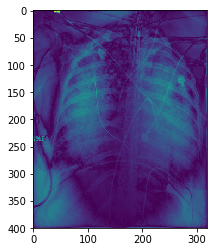

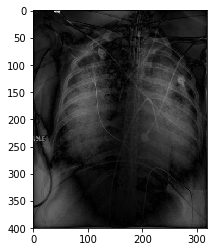

In [5]:
import cv2
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = Image.open('uno.jpg')
im.save('uno.png')
#Cargamos las dos imagenes para hacer las diferencias
diff1 = cv2.imread('uno_r.png')
diff2 = cv2.imread('Average.png')
 
#Calculamos la diferencia absoluta de las dos imagenes
diff_total = cv2.absdiff(diff1, diff2)
 
diff_total2 = cv2.absdiff(diff2, diff1)
 
#Buscamos los contornos
imagen_gris = cv2.cvtColor(diff_total, cv2.COLOR_BGR2GRAY)

 

plt.imshow(imagen_gris )
plt.show()
    #Mostramos las imagenes. ESC para salir.

plt.imshow(diff_total2)
plt.show()


# Evaluacion de PCA  utializando resta de imagenes  1_prueba

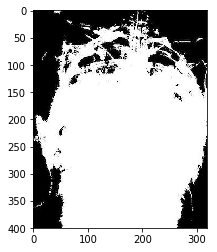

In [6]:

import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob

from PIL import Image
import os, sys

from numpy import array
from numpy import vstack

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure

def princomp(A):
 """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

 Returns :  
  coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
  score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
  latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
 """
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
 [latent,coeff] = linalg.eig(cov(M)) # attention:not always sorted
 score = dot(coeff.T,M) # projection of the data in the new space
 return coeff,score,latent


from PIL import Image

im = Image.open("Average.png")
rgb_im = im.convert('RGB')
rgb_im.save('Average_e.jpg')

im = Image.open("uno_r.png")
rgb_im = im.convert('RGB')
rgb_im.save('uno_rg.jpg')

import cv2
import numpy 
import os
image = Image.open("uno_rg.jpg")
image_new = Image.open("Average_e.jpg")
image_convert= load_image_into_numpy_array(image_new)
image_np = load_image_into_numpy_array(image)
IMAGE_SIZE = (5, 20)



import numpy as np
compa = [0, 0, 0] 
blanco = [255, 255, 255] 
blancoss = [1, 1, 1] 
compa = np.asarray(compa)
a,b,c=image_np.shape

result=image_np-image_new

result = cv2.imread('sa.jpg')



plt.imshow(result)
plt.show()
##crear funciona para guardar el nombres de la imagen y la nueva imagen marcada             
    

[[ 40  43  44 ... 260 262 263]
 [  0   0   0 ... 399 399 399]]


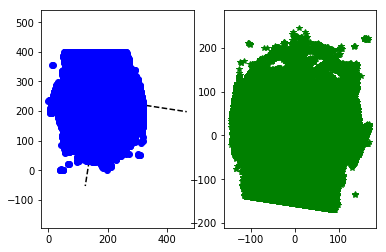

In [7]:
                    
inicio=[0,0]
uno=0
z=0
a1=[]
a2=[]

blanco = [255, 255, 255] 
#algoritmo que  permite calcular la longitud del rectangulo
for i in range(a):
    for j in range(b):
        if(np.any(np.array(result[i,j]) == np.array(blanco))  ):
            a1.append(j)
            a2.append(i)
            z=z+1
           

a3 = vstack((a1, a2))
A = a3
print (A)
coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*300]+m[0], [0, -coeff[0,1]*300]+m[1],'--k')
plot([0, coeff[1,0]*300]+m[0], [0, coeff[1,1]*300]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()


-0.988280535831253
0.15264855877829797
Ángulo en grados: -8.780445747300789


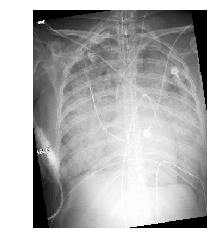

In [9]:

import math
 
x1 = m[0]
y1 = m[1]

print(coeff[0,0])
print(coeff[0,1])

x2 =-coeff[0,0]+m[0]
y2 =-coeff[0,1]+m[1]
 
x = x2 - x1
y = y2 - y1
 
angle = math.atan2(y, x) * (180.0 / math.pi)
print('Ángulo en grados: ' + str(angle))


# Obtener imagen girada 45º
girada1 =image.rotate(-angle)

# Mostrar imagen

plt.axis('off')
plt.imshow(girada1)

# Evaluacion de PCA  utializando resta de imagenes  2_prueba

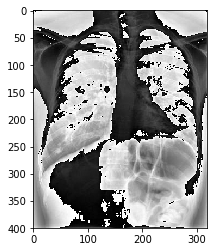

In [81]:


im1 = Image.open("dos.jpg")
width=320
height = 400
im2 = im1.resize((width, height), Image.NEAREST)

im2.save(  "dos_r.jpg")

image = Image.open("dos_r.jpg")
image_new = Image.open("Average_e.jpg")
image_convert= load_image_into_numpy_array(image_new)
image_np = load_image_into_numpy_array(image)
IMAGE_SIZE = (5, 20)
compa = np.asarray(compa)
a,b,c=image_np.shape

result=image_np-image_new



plt.imshow(result)
plt.show()

[[ 40  43  44 ... 260 262 263]
 [  0   0   0 ... 399 399 399]]


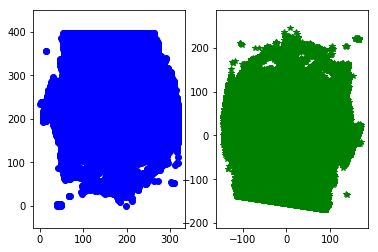

In [10]:
                  
inicio=[0,0]
uno=0
z=0
a1=[]
a2=[]

blanco = [255, 255, 255] 
#algoritmo que  permite calcular la longitud del rectangulo
for i in range(a):
    for j in range(b):
        if(np.any(np.array(result[i,j]) == np.array(blanco))  ):
            a1.append(j)
            a2.append(i)
            z=z+1
           

a3 = vstack((a1, a2))
A = a3
print (A)
coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()

Ángulo en grados: -11.636782845310156


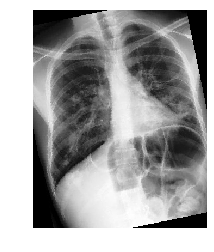

In [84]:

import math
 
x1 = 0
y1 = 0
x2 =-coeff[0,0]
y2 =-coeff[0,1]
 
x = x2 - x1
y = y2 - y1
 
angle = math.atan2(y, x) * (180.0 / math.pi)
print('Ángulo en grados: ' + str(angle))


# Obtener imagen girada 45º
girada1 =image.rotate(angle*(-1))

# Mostrar imagen

plt.axis('off')
plt.imshow(girada1)

# Evaluacion de PCA  utializando resta de imagenes  3_prueba

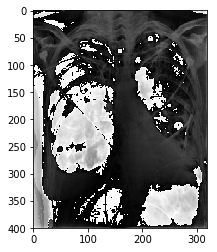

In [11]:


im1 = Image.open("tres.jpg")
width=320
height = 400
im2 = im1.resize((width, height), Image.NEAREST)

im2.save(  "tres_r.jpg")

image = Image.open("tres_r.jpg")
image_new = Image.open("Average_e.jpg")
image_convert= load_image_into_numpy_array(image_new)
image_np = load_image_into_numpy_array(image)
IMAGE_SIZE = (5, 20)
compa = np.asarray(compa)
a,b,c=image_np.shape

result=image_np-image_new



plt.imshow(result)
plt.show()

[[ 40  28  29 ... 238 271 134]
 [  1   3   3 ... 395 395 397]]


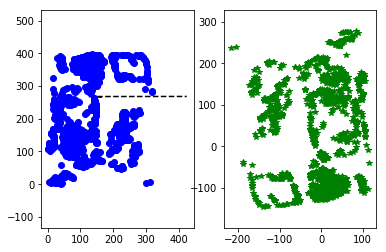

In [13]:
                 
inicio=[0,0]
uno=0
z=0
a1=[]
a2=[]

blanco = [255, 255, 255] 
#algoritmo que  permite calcular la longitud del rectangulo
for i in range(a):
    for j in range(b):
        if(np.any(np.array(result[i,j]) == np.array(blanco))  ):
            a1.append(j)
            a2.append(i)
            z=z+1
           

a3 = vstack((a1, a2))
A = a3
print (A)
coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*300]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*300]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()

Ángulo en grados: 7.313417261342723


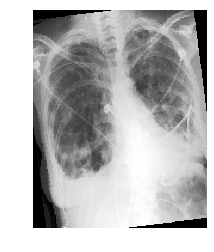

In [14]:

import math
 
x1 = 0
y1 = 0
x2 =-coeff[0,0]
y2 =-coeff[0,1]
 
x = x2 - x1
y = y2 - y1
 
angle = math.atan2(y, x) * (180.0 / math.pi)
print('Ángulo en grados: ' + str(angle))


# Obtener imagen girada 45º
girada1 =image.rotate(angle)

# Mostrar imagen

plt.axis('off')
plt.imshow(girada1)

# Evaluacion de PCA  utializando resta de imagenes  4_prueba

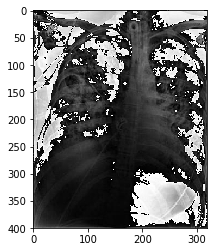

In [15]:

im1 = Image.open("cuatro.jpg")
width=320
height = 400
im2 = im1.resize((width, height), Image.NEAREST)

im2.save(  "cuatro_r.jpg")

image = Image.open("cuatro_r.jpg")
image_new = Image.open("Average_e.jpg")
image_convert= load_image_into_numpy_array(image_new)
image_np = load_image_into_numpy_array(image)
IMAGE_SIZE = (5, 20)
compa = np.asarray(compa)
a,b,c=image_np.shape

result=image_np-image_new



plt.imshow(result)
plt.show()

[[ 19 255 257 ... 205 298 313]
 [  0   0   0 ... 395 395 396]]


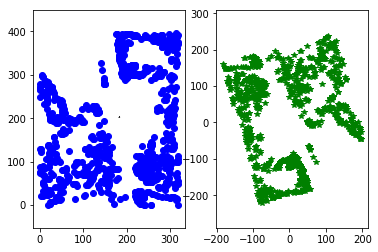

In [16]:
               
inicio=[0,0]
uno=0
z=0
a1=[]
a2=[]

blanco = [255, 255, 255] 
#algoritmo que  permite calcular la longitud del rectangulo
for i in range(a):
    for j in range(b):
        if(np.any(np.array(result[i,j]) == np.array(blanco))  ):
            a1.append(j)
            a2.append(i)
            z=z+1
           

a3 = vstack((a1, a2))
A = a3
print (A)
coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()

Ángulo en grados: 15.11400609061116


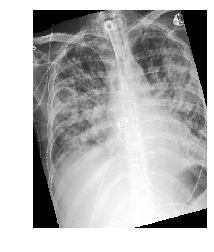

In [18]:

import math
 
x1 = 0
y1 = 0
x2 =-coeff[0,0]
y2 =-coeff[0,1]
 
x = x2 - x1
y = y2 - y1
 
angle = math.atan2(y, x) * (180.0 / math.pi)
print('Ángulo en grados: ' + str(angle))


# Obtener imagen girada 45º
girada1 =image.rotate(angle)

# Mostrar imagen

plt.axis('off')
plt.imshow(girada1)

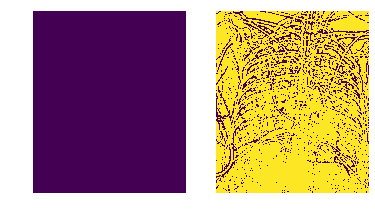

In [139]:
import numpy as np
import cv2

gray = cv2.imread('uno.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('tutorial umbral', gray)

# umbral fijo
_, dst1 = cv2.threshold(gray, 96, 0, cv2.THRESH_BINARY)

cv2.imshow('umbral fijo', dst1)

# umbral adaptable
gray = cv2.medianBlur(gray, 5)
dst2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow('umbral adaptable', dst2)
subplot(121)
plt.axis('off')

plt.imshow(dst1)
subplot(122)
plt.axis('off')
plt.imshow(dst2)
show()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('uno.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)

cv2.imshow('Bordes de Iamgen', edges)
cv2.imshow('Detector de Lineas', img)
cv2.waitKey()


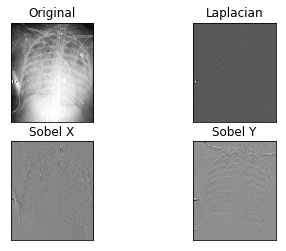

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('uno.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


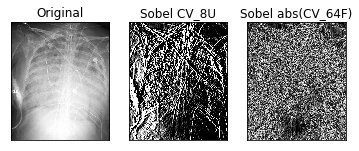

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('uno.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

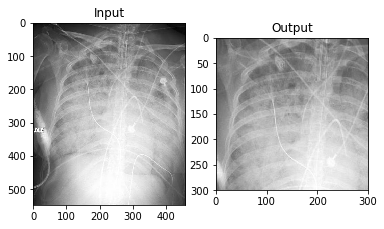

In [8]:
img = cv2.imread('uno.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

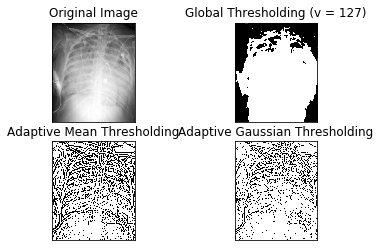

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('uno.jpg',0)
img = cv2.medianBlur(img,5)
xrange=range
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [1]:
import cv2
import numpy as np

img = cv2.imread('uno.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: too many values to unpack (expected 2)